In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
df = pd.read_csv('/Users/edwardmattern/Documents/power_model_final.csv')

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

df.set_index('DATE', inplace=True)

In [6]:
df

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,LNG_PRICE,NG_STORAGE,...,AWND,PRCP,WT_FOG,WT_HFOG,WT_THNDR,WT_ICE,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW
DATE,,,,,,,,,,,,,,,,,,,,,
2024-04-08,1.8575,71.1828,86.43,128.200,26.35,24.42,28.31,34.26,5.46,1014,...,9.40,0.01,1,0,0,0,0,0,1,43277.56926
2024-04-05,1.7850,67.9644,86.91,129.100,9.06,8.29,9.52,3.58,5.46,1014,...,7.16,0.00,0,0,0,0,0,0,0,43223.97195
2024-04-04,1.7740,65.6532,86.59,128.200,17.87,16.67,19.85,32.30,5.46,996,...,4.25,0.00,0,0,0,0,0,0,0,43286.15326
2024-04-03,1.8410,64.4220,85.43,129.650,29.29,26.91,31.87,60.99,5.46,996,...,8.50,0.00,0,0,0,0,0,0,0,43259.42649
2024-04-02,1.8620,65.9016,85.15,132.250,18.86,14.42,18.98,16.74,5.46,996,...,11.86,0.00,0,0,0,0,0,0,0,43167.79365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2.6660,36.3420,52.24,86.285,24.37,24.62,25.52,25.20,6.08,1126,...,7.16,0.00,0,0,0,0,0,0,0,42437.07003
2021-01-07,2.7270,37.4328,50.83,86.285,20.55,20.50,21.19,20.96,6.08,1163,...,10.74,0.00,0,0,0,0,0,0,0,45691.55259
2021-01-06,2.7530,37.2924,50.63,86.286,16.51,16.97,15.75,12.71,6.08,1163,...,11.63,1.04,1,0,1,0,0,0,0,49363.34411


In [7]:
df.describe()

,NG1_PRICE,CO2_PRICE,OIL_PRICE,COAL_PRICE,LMP_H,LMP_N,LMP_S,LMP_W,LNG_PRICE,NG_STORAGE,...,AWND,PRCP,WT_FOG,WT_HFOG,WT_THNDR,WT_ICE,WT_HAIL,WT_GLAZE,WT_HAZE,LOAD_MW
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,4.181724,79.940570,79.099806,214.813131,89.219046,86.226150,84.481192,88.566138,8.965983,1105.002384,...,7.825518,0.132658,0.412396,0.046484,0.176400,0.002384,0.001192,0.001192,0.106079,48539.586567
std,1.996722,18.938453,12.792776,113.275980,511.789821,513.122372,510.534617,513.415033,2.911182,133.542570,...,3.141174,0.409454,0.492559,0.210656,0.381388,0.048795,0.034524,0.034524,0.308122,8417.121634
min,1.555500,34.149600,47.620000,83.750000,8.670000,7.950000,3.540000,-1.680000,5.460000,901.000000,...,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34247.401000
25%,2.652500,64.762200,71.470000,130.400000,26.355000,24.150000,24.310000,25.340000,6.570000,1014.000000,...,5.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42208.706635
50%,3.508000,85.276800,77.810000,166.950000,36.580000,34.220000,34.290000,37.300000,7.750000,1093.000000,...,7.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45888.047340
75%,5.468500,95.131800,85.220000,326.325000,58.490000,54.565000,52.390000,59.740000,10.330000,1171.000000,...,9.840000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54372.102060
max,9.710000,113.551200,119.650000,457.800000,8820.330000,8845.390000,8810.790000,8850.530000,16.720000,1489.000000,...,19.240000,4.050000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71634.595910


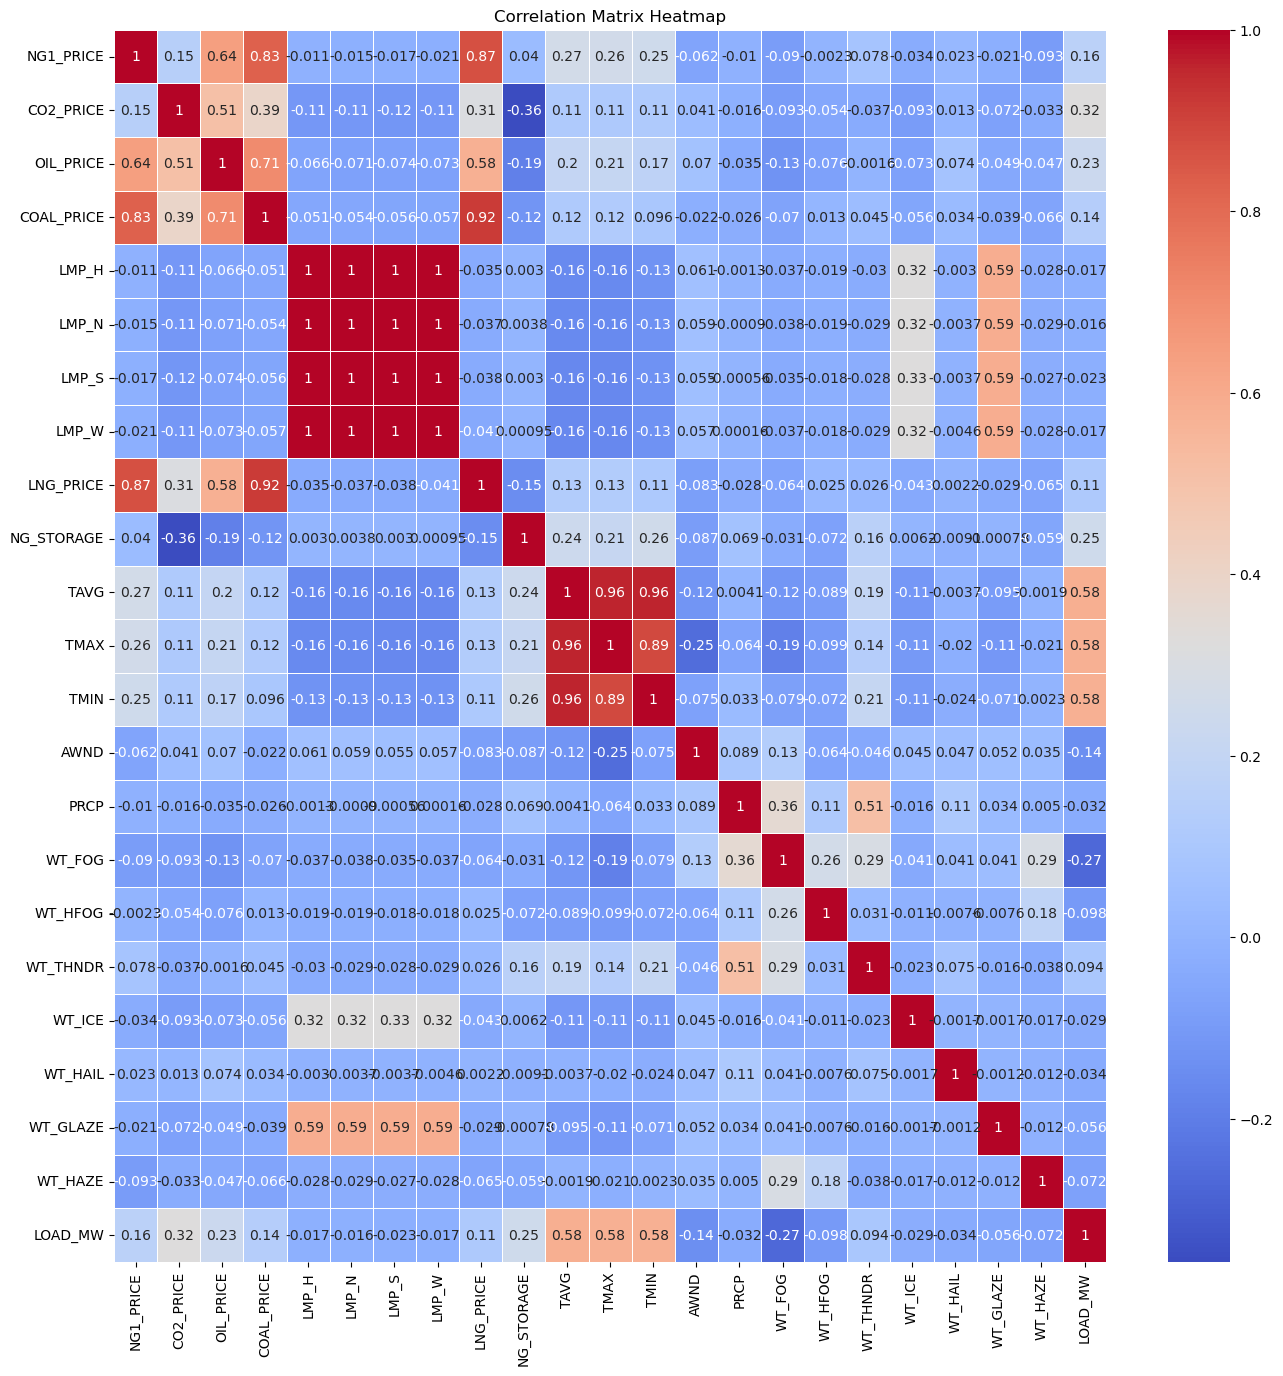

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

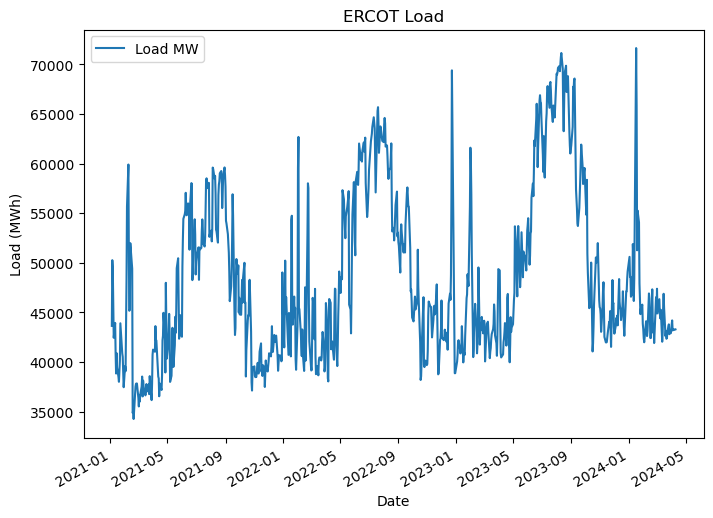

In [9]:
df['LOAD_MW'].plot(figsize=(8, 6), label='Load MW')
plt.xlabel('Date')
plt.ylabel('Load (MWh)')
plt.title('ERCOT Load')
plt.legend()


plt.show()

In [11]:
X1 = df[['AWND','PRCP','TAVG','TMAX','TMIN','CO2_PRICE','OIL_PRICE','COAL_PRICE','NG1_PRICE','LNG_PRICE','NG_STORAGE'
        ,'LMP_H','LMP_N','LMP_W','LMP_S']]
y1 = df['LOAD_MW']

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [13]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression()

In [14]:
y1_pred = model.predict(X1_test)
mae = mean_absolute_error(y1_test, y1_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mape = mean_absolute_percentage_error(y1_test,y1_pred)
print(f"Mean Absolute Percentage Error: {mape:.2f}")


Mean Absolute Error: 4118.77
Mean Absolute Percentage Error: 0.08


In [20]:
X2 = df[['TAVG','TMAX','TMIN','LMP_H','LMP_N','LMP_W','LMP_S','AWND','PRCP','COAL_PRICE','OIL_PRICE','CO2_PRICE','NG1_PRICE'
       ,'WT_FOG','WT_HFOG','WT_ICE','WT_GLAZE','WT_HAZE','WT_THNDR']]
y2 = df['LOAD_MW']

In [21]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
regressor = GradientBoostingRegressor(random_state=42)
regressor.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=42)

In [23]:
y2_pred = regressor.predict(X2_test)

In [25]:
mae = mean_absolute_error(y2_test, y2_pred)
mape = mean_absolute_percentage_error(y2_test, y2_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")

Mean Absolute Error: 2409.76
Mean Absolute Percentage Error: 0.05


In [27]:
feature_importances = regressor.feature_importances_
feature_names = X.columns
indices = feature_importances.argsort()[::-1]

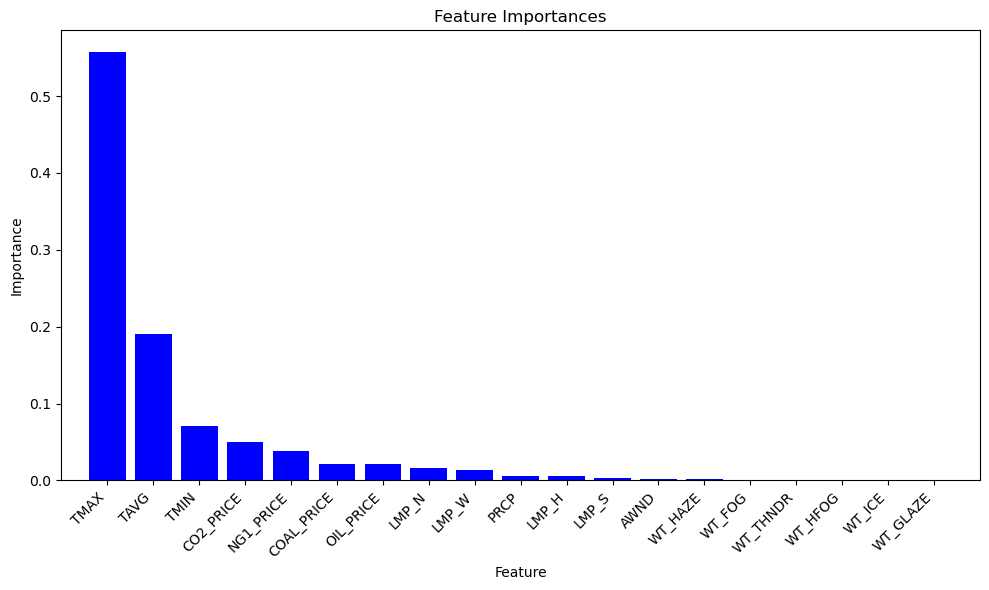

In [28]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [40]:
X3 = df[['TAVG','TMAX','TMIN','LMP_H','LMP_N','LMP_W','LMP_S','AWND','PRCP','COAL_PRICE','OIL_PRICE','CO2_PRICE','NG1_PRICE'
       ,'WT_FOG','WT_HFOG','WT_ICE','WT_GLAZE','WT_HAZE','WT_THNDR']]
y3 = df['LOAD_MW']

In [41]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3)

In [47]:
xgb_model.fit(X3_train, y3_train)
y3_pred = xgb_model.predict(X3_test)

In [48]:
mae = mean_absolute_error(y3_test, y3_pred)
mape = mean_absolute_percentage_error(y3_test, y3_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 2421.7390813169645
Mean Absolute Percentage Error (MAPE): 0.05179536057048858


In [75]:
df['TSQ'] = df['TAVG'] ** 2
print(f"Temperature Squared (TSQ): {df['TSQ']}")

Temperature Squared (TSQ): DATE
2024-04-08    5776
2024-04-05    5184
2024-04-04    4489
2024-04-03    4225
2024-04-02    5929
              ... 
2021-01-08    2304
2021-01-07    2809
2021-01-06    3844
2021-01-05    3249
2021-01-04    3600
Name: TSQ, Length: 839, dtype: int64


In [76]:
df['Physics_Load_Estimate'] = 0.5 * df['TAVG'] + 0.05 * df['TSQ'] + 1.2

In [77]:
df['Residual_Load'] = df['LOAD_MW'] - df['Physics_Load_Estimate']

In [78]:
X4 = df[['TAVG','TMAX','TMIN','LMP_H','LMP_N','LMP_W','LMP_S','AWND','PRCP','COAL_PRICE','OIL_PRICE','CO2_PRICE','NG1_PRICE'
       ,'WT_FOG','WT_HFOG','WT_ICE','WT_GLAZE','WT_HAZE','WT_THNDR']].values
y4 = df['Residual_Load'].values

In [79]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model4 = GradientBoostingRegressor()
model4.fit(X4_train, y4_train)

GradientBoostingRegressor()

In [81]:
y4_pred_residual = model4.predict(X4_test)

In [82]:
df['ML_Residual_Pred'] = model4.predict(X4)  
df['Hybrid_Load_Prediction'] = df['Physics_Load_Estimate'] + df['ML_Residual_Pred']

/Users/edwardmattern/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [84]:
print("Mean Absolute Error:", mean_absolute_error(df['LOAD_MW'], df['Hybrid_Load_Prediction']))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(df['LOAD_MW'], df['Hybrid_Load_Prediction']))

Mean Absolute Error: 1776.9707236394777
Mean Absolute Percentage Error: 0.03796336063624756


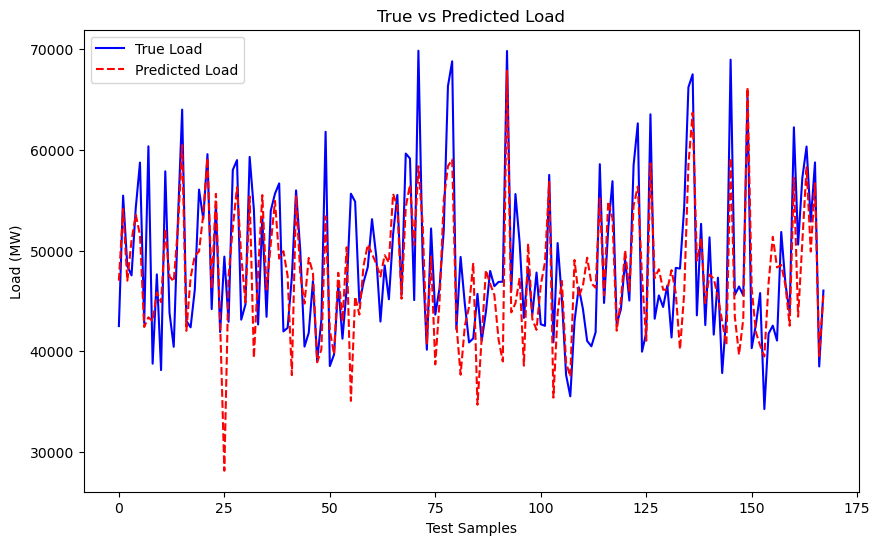

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(y1_test.values, label="True Load", color="blue")
plt.plot(y1_pred, label="Predicted Load", color="red", linestyle="--")
plt.title("Machine Learning Model 1 (Linear Regression))
plt.xlabel("Test Samples")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

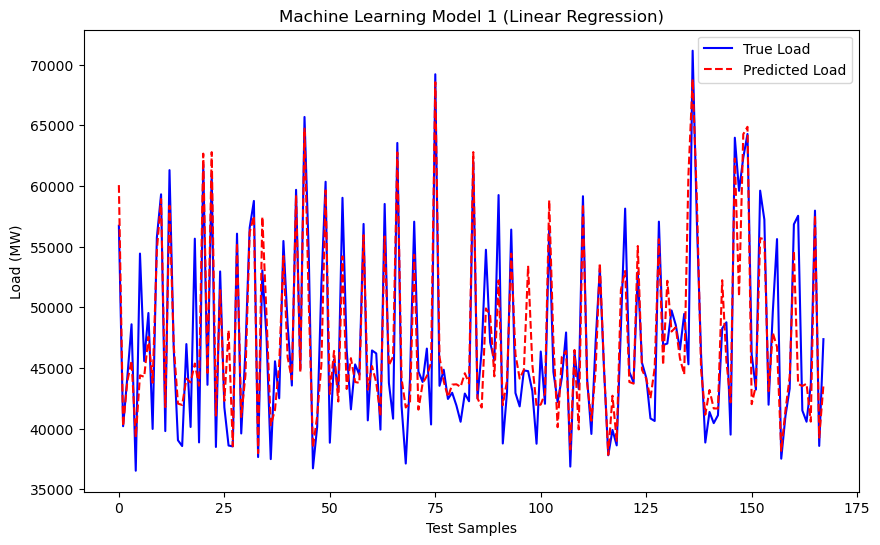

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(y2_test.values, label="True Load", color="blue")
plt.plot(y2_pred, label="Predicted Load", color="red", linestyle="--")
plt.title("Machine Learning Model 2 (Gradient Boost)")
plt.xlabel("Test Samples")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

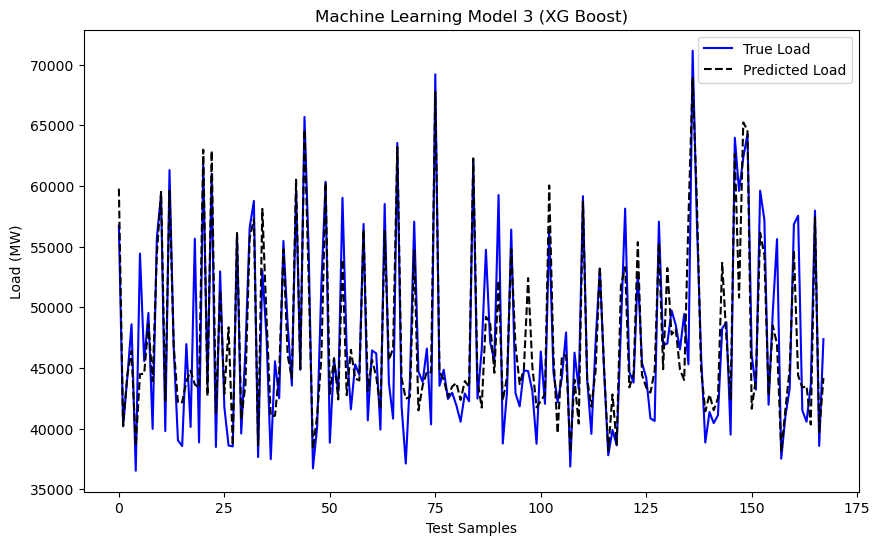

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(y3_test.values, label="True Load", color="blue")
plt.plot(y3_pred, label="Predicted Load", color="black", linestyle="--")
plt.title("Machine Learning Model 3 (XG Boost)")
plt.xlabel("Test Samples")
plt.ylabel("Load (MW)")
plt.legend()
plt.show()

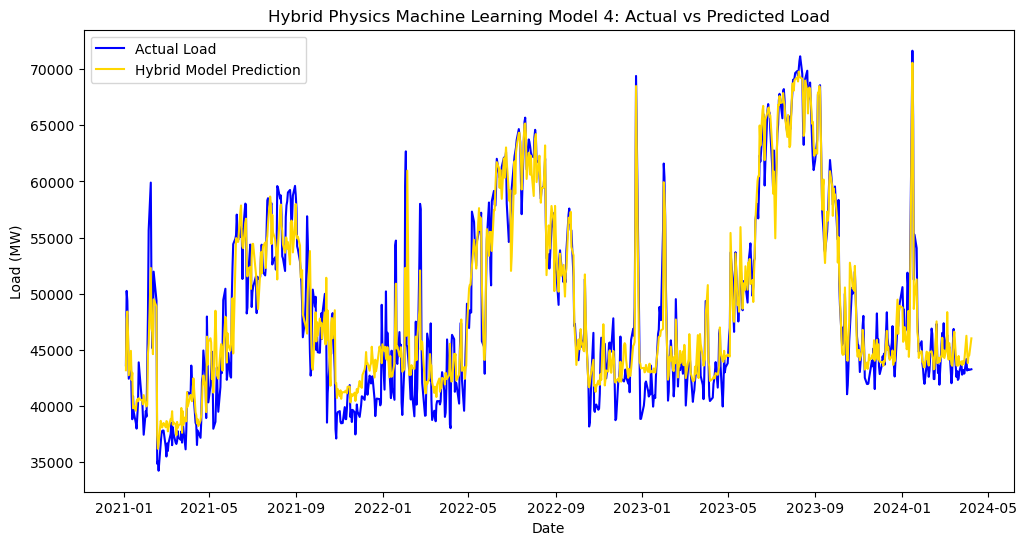

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LOAD_MW'], label='Actual Load', color='blue')
plt.plot(df.index, df['Hybrid_Load_Prediction'], label='Hybrid Model Prediction', color='gold')
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.title("Hybrid Physics Machine Learning Model 4: Actual vs Predicted Load")
plt.legend()
plt.show()